# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutoria]https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply scenario discovery

1. Generate 10 policies and 1000 scenarios and evaluate them.
2. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop_columns`*
3. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability


In [33]:
import pandas as pd
import numpy as np

from ema_workbench import SequentialEvaluator, MultiprocessingEvaluator, ema_logging, Model, RealParameter, ScalarOutcome, ema_logging
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt

ema_logging.log_to_stderr(ema_logging.INFO) 

C:\Users\newbi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\newbi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\newbi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [1]:
from lakemodel_function import lake_problem

In [4]:
model = Model("lakeproblem", function=lake_problem)
model.time_horizon = 100

model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                       RealParameter('stdev', 0.001, 0.005),
                       RealParameter('b', 0.1, 0.45),
                       RealParameter('q', 2, 4.5),
                       RealParameter('delta', 0.93, 0.99)]

#List of the model outcomes must match.
model.outcomes = [ScalarOutcome('max_P'),
                  ScalarOutcome('utility'),
                  ScalarOutcome('inertia'),
                  ScalarOutcome('reliability')]

#You make 100 levers and they have a value between 0 and 0.1
#Value given for the steps - each year. Str(i) to correspond to the dictionary steps.
model.levers = [RealParameter(str(i), 0, 0.1) for i in range(model.time_horizon)]

In [5]:
n_scenarios = 1000
n_policies = 10

with MultiprocessingEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(n_scenarios, n_policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 10 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


[MainProcess/INFO] no time dimension found in results


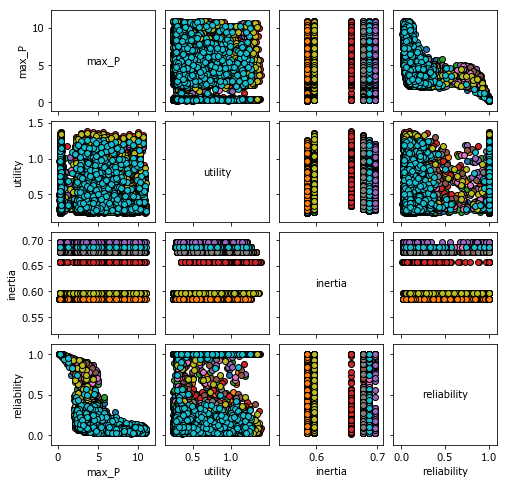

In [45]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=False)
fig.set_size_inches(8,8)
plt.show()

In [113]:
x = experiments.drop(experiments.columns[5:], axis = 1)
#Get the 10% worst results percentile
y = outcomes["reliability"] < np.percentile(outcomes["reliability"], 10)

In [86]:
#rotated_experiments, rotation_matrix = prim.pca_preprocess(x, y)

In [120]:
prim_alg = prim.Prim(x, y, threshold=0.4)
box1 = prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 853 cases of interest
[MainProcess/INFO] mean: 0.8568627450980392, mass: 0.051, coverage: 0.5123094958968347, density: 0.8568627450980392 restricted_dimensions: 3


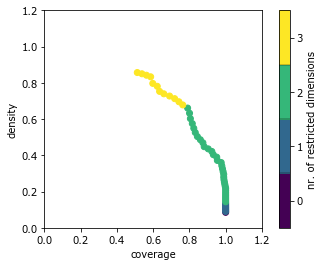

coverage    0.512309
density     0.856863
id                55
mass           0.051
mean        0.856863
res_dim            3
Name: 55, dtype: object

        box 55                                           
           min       max                        qp values
q     2.001525  2.420993  [-1.0, 3.9542723343158703e-199]
b     0.100169  0.228742  [-1.0, 1.8380181866608924e-109]
mean  0.018833  0.049974    [0.0049007870305196625, -1.0]



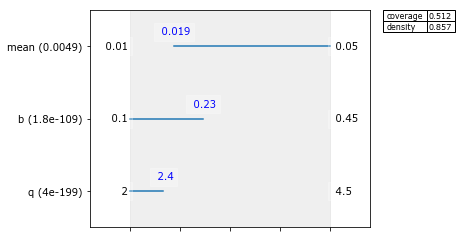

In [121]:
box1.show_tradeoff()
plt.show()

box1.inspect()
box1.inspect(style='graph')
plt.show()

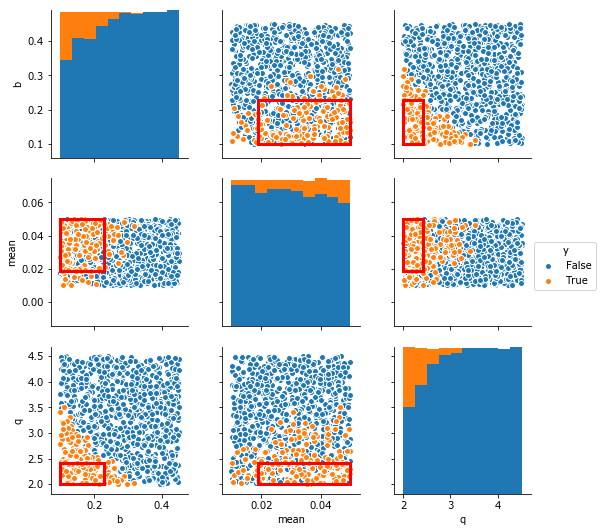

In [122]:
box1.show_pairs_scatter()
plt.show()

In [127]:
box2 = prim_alg.find_box()
box3 = prim_alg.find_box()

[MainProcess/INFO] no data remaining
[MainProcess/INFO] no data remaining
[MainProcess/INFO] no data remaining


In [126]:
print(prim_alg.stats_to_dataframe())
print(prim_alg.boxes_to_dataframe())

       coverage   density   mass  res_dim
box 1  0.512309  0.856863  0.051        3
box 2  0.279015  0.466667  0.051        2
box 3  0.208675  0.019822  0.898        0
         box 1               box 2               box 3          
           min       max       min       max       min       max
q     2.001525  2.420993  2.001525  2.657533  2.001525  4.499113
b     0.100169  0.228742  0.100169  0.233297  0.100169  0.449650
mean  0.018833  0.049974  0.010019  0.049974  0.010019  0.049974


## Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

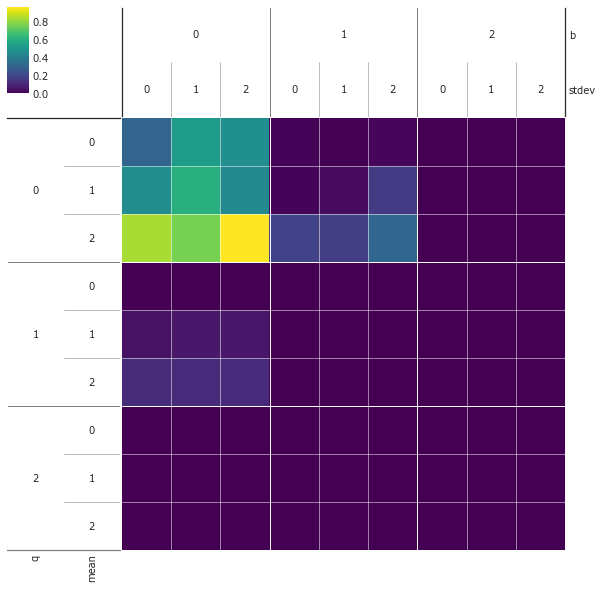

In [107]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()